In [5]:
# Import necessary libraries
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 

from warnings import filterwarnings
filterwarnings('ignore')
import cartopy.crs as ccrs
import cartopy.feature as cfeature 

In [6]:
data = xr.open_mfdataset('C:/Users/HP/Desktop/NAMIBIA/*.nc')

In [7]:
import netCDF4 as nc
from netCDF4 import Dataset

In [8]:
data.to_netcdf('NAMIBIA.nc')

In [9]:
# Load daily rainfall data for Namibia
data=xr.open_dataset('NAMIBIA.nc')
data=data.precip
data=data.where(data != -99.0)
data

<xarray.DataArray 'precip' (datetime: 3652, lat: 50, lon: 57)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * lon       (lon) float32 11.5 11.75 12.0 12.25 12.5 ... 24.75 25.0 25.25 25.5
  * lat       (lat) float32 -16.5 -16.75 -17.0 -17.25 ... -28.25 -28.5 -28.75
  * datetime  (datetime) datetime64[ns] 2010-01-01 2010-01-02 ... 2019-12-31
Attributes:
    grid_mapping:  crs

In [10]:
# Compute monthly rainfall totals and climatologies
monthly_totals = data.groupby('datetime.month').sum('datetime')
monthly_climatologies = monthly_totals.mean('month')

In [11]:
# Compute the annual totals and averages across the country
annual_totals = data.groupby('datetime.year').sum('datetime')
annual_averages = annual_totals.mean('year')

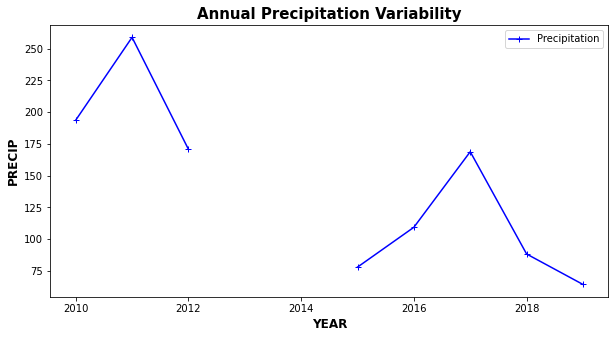

In [12]:
#plotting time series
fig,ax = plt.subplots(figsize = (10,5))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(annual_totals.year,annual_totals.mean(['lon','lat']),color = 'blue', lw = 1.5 ,label= 'Precipitation',marker='+')
ax.set_title('Annual Precipitation Variability', fontweight = 'bold', fontsize=15 ,color = 'Black')
ax.set_xlabel("YEAR", fontweight = 'bold',fontsize = 12, color= 'Black')
ax.set_ylabel('PRECIP', fontweight = 'bold', fontsize = 12, color= 'Black')
plt.legend()
#plt.savefig('Done.jpeg');

In [14]:
# Compute the number of wet and dry days per month and per year
namibia_drydays_per_year = data.where(data < 1).groupby('datetime.year').count('datetime')
namibia_wetdays_per_year = data.where(data >= 1).groupby('datetime.year').count('datetime')
namibia_drydays_per_month = data.where(data < 1).groupby('datetime.month').count('datetime')
namibia_wetdays_per_month = data.where(data >= 1).groupby('datetime.month').count('datetime')



In [15]:

# Extreme Rainfall >10mm per month
namibia_rr10mm_days = data.where(data > 10).groupby('datetime.month').count('datetime')
# Extreme Rainfall >20mm per month
namibia_rr20mm_days = data.where(data > 20).groupby('datetime.month').count('datetime')

# Extreme Rainfall >10mm per year
Xrain10 = data.where(data > 10).groupby('datetime.year').count('datetime')

# Extreme Rainfall >20mm per year
Xrain20 = data.where(data > 20).groupby('datetime.year').count('datetime')


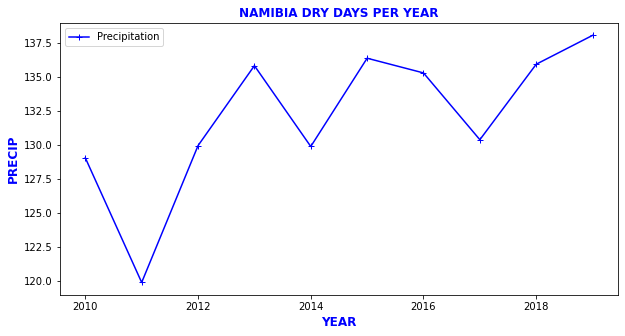

In [16]:
#plotting time series for drydays per year
fig,ax = plt.subplots(figsize = (10,5))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(annual_totals.year,namibia_drydays_per_year.mean(['lon','lat']),color = 'blue', lw = 1.5 ,label= 'Precipitation',marker='+')
ax.set_title('NAMIBIA DRY DAYS PER YEAR', fontweight = 'bold', fontsize=12 ,color = 'blue')
ax.set_xlabel("YEAR", fontweight = 'bold',fontsize = 12, color= 'blue')
ax.set_ylabel('PRECIP', fontweight = 'bold', fontsize = 12, color= 'blue')
plt.legend()
#plt.savefig('Done1.jpeg');

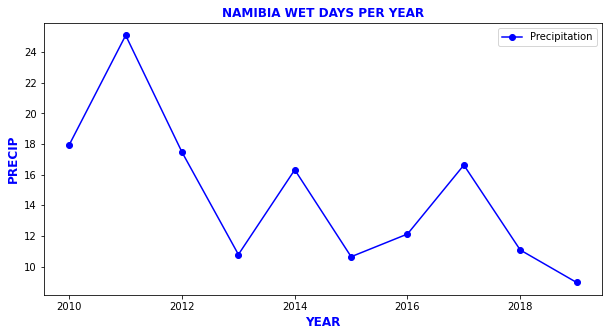

In [12]:
#plotting time series for wetdays per year
fig,ax = plt.subplots(figsize = (10,5))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(annual_totals.year,namibia_wetdays_per_year.mean(['lon','lat']),color = 'blue', lw = 1.5 ,label= 'Precipitation',marker='o')
ax.set_title('NAMIBIA WET DAYS PER YEAR', fontweight = 'bold', fontsize=12 ,color = 'blue')
ax.set_xlabel("YEAR", fontweight = 'bold',fontsize = 12, color= 'blue')
ax.set_ylabel('PRECIP', fontweight = 'bold', fontsize = 12, color= 'blue')
plt.legend()
#plt.savefig('Done2.jpeg');

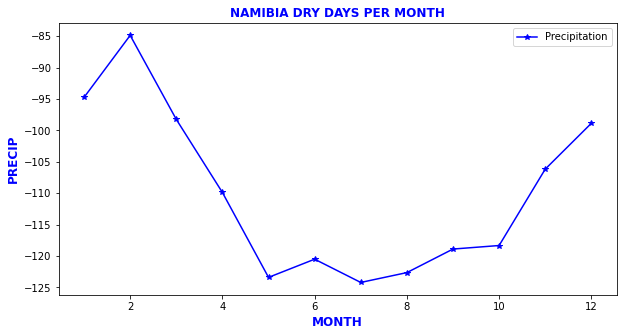

In [50]:
#plotting time series for dry days per month
fig,ax = plt.subplots(figsize = (10,5))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(monthly_totals.month,namibia_drydays_per_month.mean(['lon','lat'])*-1,color = 'blue', lw = 1.5 ,label= 'Precipitation',marker='*')
ax.set_title('NAMIBIA DRY DAYS PER MONTH', fontweight = 'bold', fontsize=12 ,color = 'Blue')
ax.set_xlabel("MONTH", fontweight = 'bold',fontsize = 12, color= 'Blue')
ax.set_ylabel('PRECIP', fontweight = 'bold', fontsize = 12, color= 'Blue')
plt.legend()
plt.savefig('Done3.jpeg');

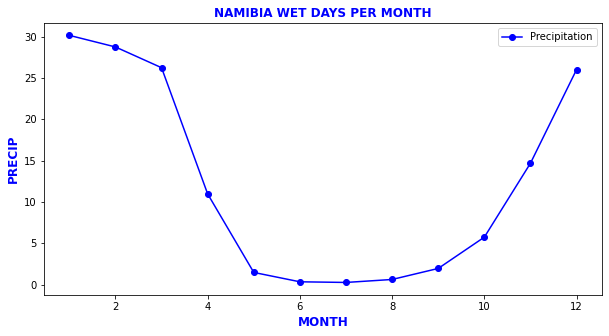

In [13]:
#plotting time series for wet days per month
fig,ax = plt.subplots(figsize = (10,5))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(monthly_totals.month,namibia_wetdays_per_month.mean(['lon','lat']),color = 'blue', lw = 1.5 ,label= 'Precipitation',marker='o')
ax.set_title('NAMIBIA WET DAYS PER MONTH', fontweight = 'bold', fontsize=12 ,color = 'Blue')
ax.set_xlabel("MONTH", fontweight = 'bold',fontsize = 12, color= 'Blue')
ax.set_ylabel('PRECIP', fontweight = 'bold', fontsize = 12, color= 'Blue')
plt.legend()
#plt.savefig('Done4.jpeg');

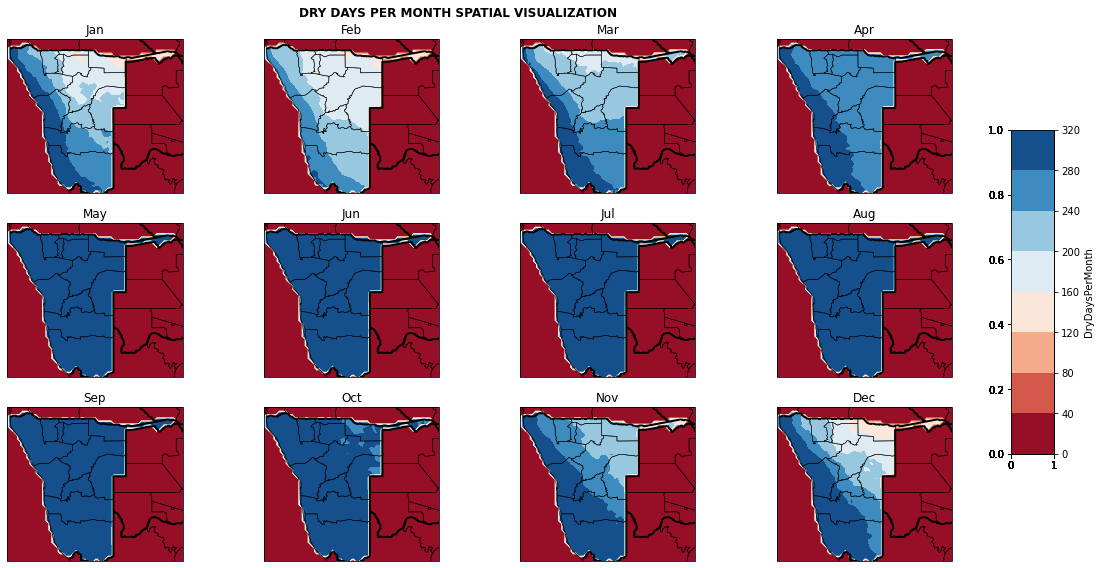

In [14]:
# spatial visualization of dry days per month
fig,ax=plt.subplots(3,4,figsize=(24,9), 
                    subplot_kw={'projection': ccrs.PlateCarree()},squeeze=0.1)
ax=ax.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
    ax[i].set_extent([11.5,25.5,-16.5,-28.75])
    
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(namibia_drydays_per_month.lon, namibia_drydays_per_month.lat, namibia_drydays_per_month[i],
                       cmap='RdBu', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='DryDaysPerMonth')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('DRY DAYS PER MONTH SPATIAL VISUALIZATION', fontweight='bold');
#plt.savefig('Done5.jpeg');

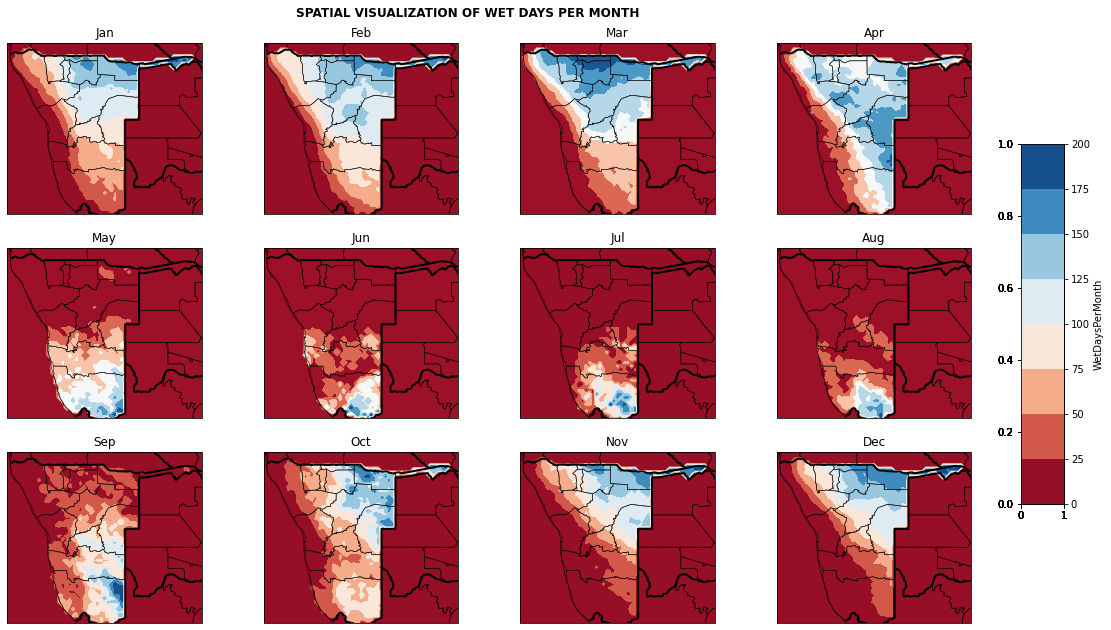

In [15]:
# spatial visualization of wet days per month
fig,ax=plt.subplots(3,4,figsize=(24,10), 
                    subplot_kw={'projection': ccrs.PlateCarree()},squeeze=0.1)
ax=ax.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)

    ax[i].set_extent([11.5,25.5,-16.5,-28.75])
    
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(namibia_wetdays_per_month.lon, namibia_wetdays_per_month.lat, namibia_wetdays_per_month[i],
                       cmap='RdBu', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='WetDaysPerMonth')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('SPATIAL VISUALIZATION OF WET DAYS PER MONTH', fontweight='bold');
#plt.savefig('Done6.jpeg');

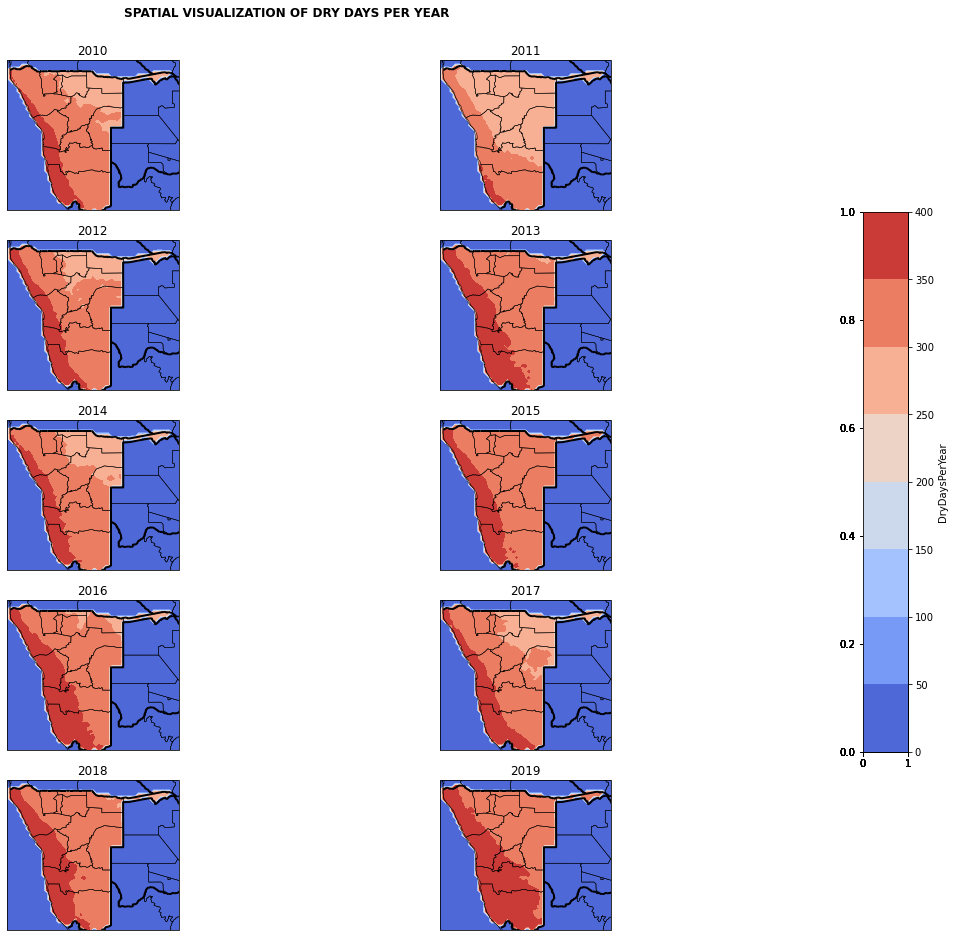

In [16]:
# spatial visualization of dry days per year
fig,ax=plt.subplots(5,2,figsize=(25,15), 
                    subplot_kw={'projection': ccrs.PlateCarree()})
ax=ax.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)

    ax[i].set_extent([11.5,25.5,-16.5,-28.75])
    ax[i].set_title(annual_totals.year.data[i])
    cb= ax[i].contourf(namibia_drydays_per_year.lon, namibia_drydays_per_year.lat, namibia_drydays_per_year[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='DryDaysPerYear')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('SPATIAL VISUALIZATION OF DRY DAYS PER YEAR', fontweight='bold');
#plt.savefig('Done7.jpeg');

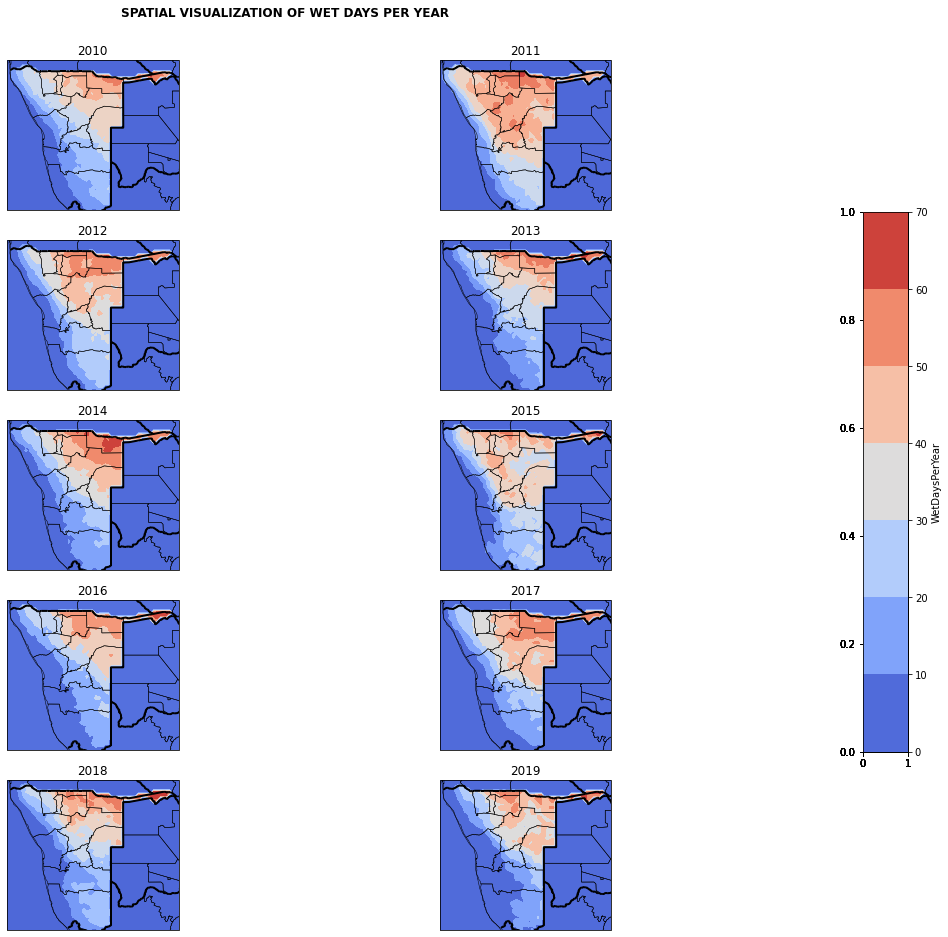

In [17]:
# spatial visualization OF wet days per year
fig,ax=plt.subplots(5,2,figsize=(25,15), 
                    subplot_kw={'projection': ccrs.PlateCarree()})
ax=ax.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)

    ax[i].set_extent([11.5,25.5,-16.5,-28.75])
    ax[i].set_title(annual_totals.year.data[i])
    cb= ax[i].contourf(namibia_wetdays_per_year.lon, namibia_wetdays_per_year.lat, namibia_wetdays_per_year[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='WetDaysPerYear')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('SPATIAL VISUALIZATION OF WET DAYS PER YEAR ', fontweight='bold');
#plt.savefig('Done8.jpeg');

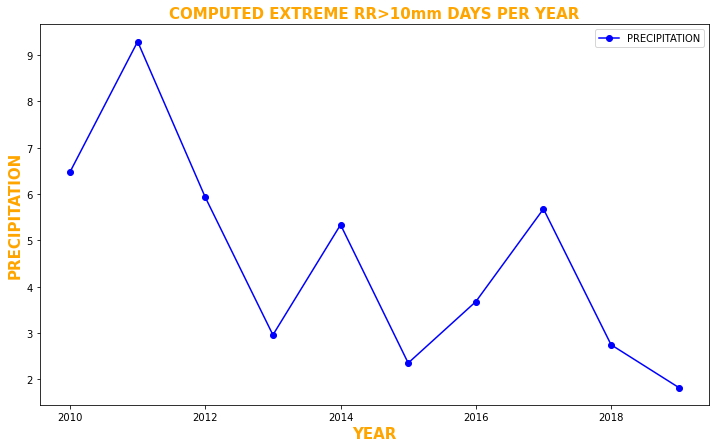

In [18]:
#plotting time series for extreme dry days per year(RR > 10mm)
fig,ax = plt.subplots(figsize = (12,7))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(Xrain10.year,Xrain10.mean(['lon','lat']),color = 'blue', lw = 1.5 ,label= 'PRECIPITATION',marker='o')
ax.set_title('COMPUTED EXTREME RR>10mm DAYS PER YEAR', fontweight = 'bold', fontsize=15 ,color = 'Orange')
ax.set_xlabel("YEAR", fontweight = 'bold',fontsize = 15, color= 'Orange')
ax.set_ylabel('PRECIPITATION', fontweight = 'bold', fontsize = 15, color= 'Orange')
plt.legend()
#plt.savefig('Done17.jpeg');

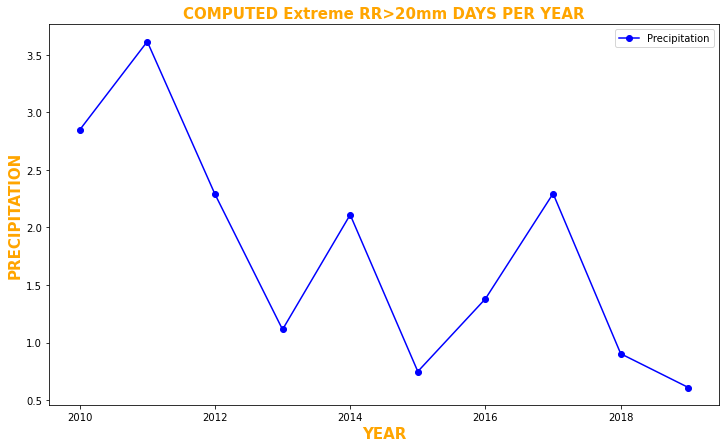

In [23]:
#plotting time series for extreme dry days per year(RR > 20mm)
fig,ax = plt.subplots(figsize = (12,7))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(Xrain20.year,Xrain20.mean(['lon','lat']),color = 'blue', lw = 1.5 ,label= 'Precipitation',marker='o')
ax.set_title('COMPUTED Extreme RR>20mm DAYS PER YEAR', fontweight = 'bold', fontsize=15 ,color = 'Orange')
ax.set_xlabel("YEAR", fontweight = 'bold',fontsize = 15, color= 'Orange')
ax.set_ylabel('PRECIPITATION', fontweight = 'bold', fontsize = 15, color= 'Orange')
plt.legend()
plt.savefig('Done16.jpeg');


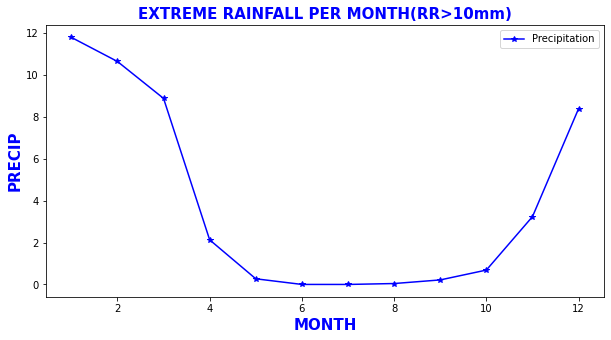

In [107]:
#plotting extreme dry days per month(RR > 10mm)
fig,ax = plt.subplots(figsize = (10,5))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(namibia_rr10mm_days.month,namibia_rr10mm_days.mean(['lon','lat']),color = 'blue', lw = 1.5 ,label= 'Precipitation',marker='*')
ax.set_title('EXTREME RAINFALL PER MONTH(RR>10mm)', fontweight = 'bold', fontsize=15 ,color = 'Blue')
ax.set_xlabel("MONTH", fontweight = 'bold',fontsize = 15, color= 'Blue')
ax.set_ylabel('PRECIP', fontweight = 'bold', fontsize = 15, color= 'Blue')
plt.legend()


#plt.savefig('Done10.jpeg');

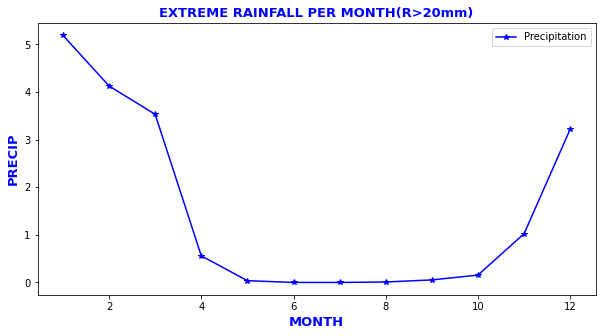

In [108]:
#plotting extreme dry days per month(RR > 20mm)
fig,ax = plt.subplots(figsize = (10,5))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(namibia_rr20mm_days.month,namibia_rr20mm_days.mean(['lon','lat']),color = 'blue', lw = 1.5 ,label= 'Precipitation',marker='*')
ax.set_title('EXTREME RAINFALL PER MONTH(R>20mm)', fontweight = 'bold', fontsize=13 ,color = 'Blue')
ax.set_xlabel("MONTH", fontweight = 'bold',fontsize = 13, color= 'Blue')
ax.set_ylabel('PRECIP', fontweight = 'bold', fontsize = 13, color= 'Blue')
plt.legend()
plt.savefig('Done11.jpeg');



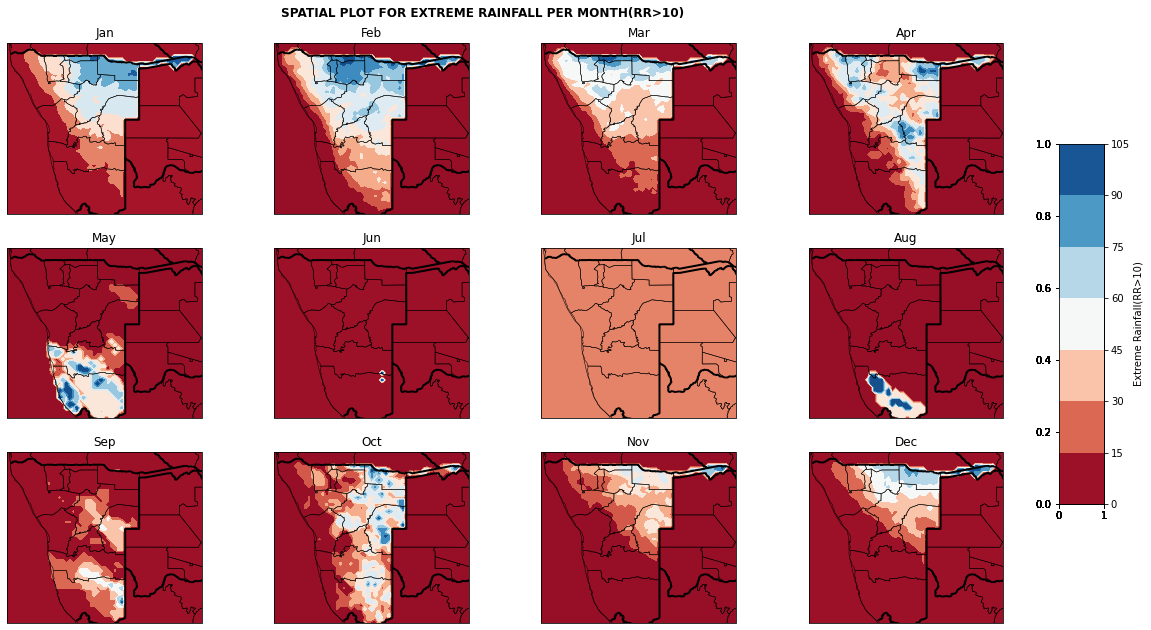

In [109]:
# spatial plots for EXTREME RAINFALL PER MONTH(RR>10)
fig,ax=plt.subplots(3,4,figsize=(25,10), 
                    subplot_kw={'projection': ccrs.PlateCarree()},squeeze=0.1)
ax=ax.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
    ax[i].set_extent([11.5,25.5,-16.5,-28.75])

    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(namibia_rr10mm_days.lon, namibia_rr10mm_days.lat, namibia_rr10mm_days[i],
                       cmap='RdBu', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Extreme Rainfall(RR>10)')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('SPATIAL PLOT FOR EXTREME RAINFALL PER MONTH(RR>10)', fontweight='bold');
plt.savefig('done12.png');



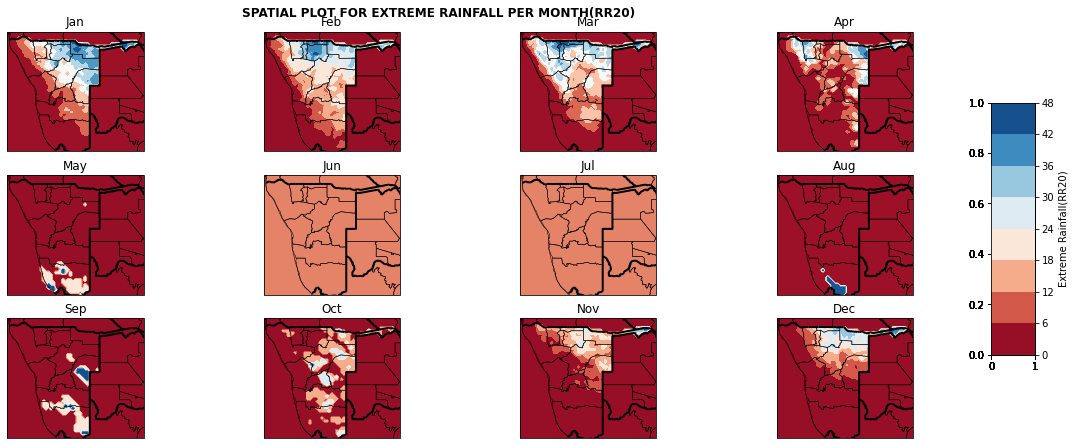

In [110]:
# spatial plots for EXTREME RAINFALL PER MONTH(RR>20) 
fig,ax=plt.subplots(3,4,figsize=(24,7), 
                    subplot_kw={'projection': ccrs.PlateCarree()},squeeze=0.1)
ax=ax.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)

    ax[i].set_extent([11.5,25.5,-16.5,-28.75])
    
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(namibia_rr20mm_days.lon, namibia_rr20mm_days.lat, namibia_rr20mm_days[i],
                       cmap='RdBu', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Extreme Rainfall(RR20)')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('SPATIAL PLOT FOR EXTREME RAINFALL PER MONTH(RR20)', fontweight='bold');
plt.savefig('done13.png');



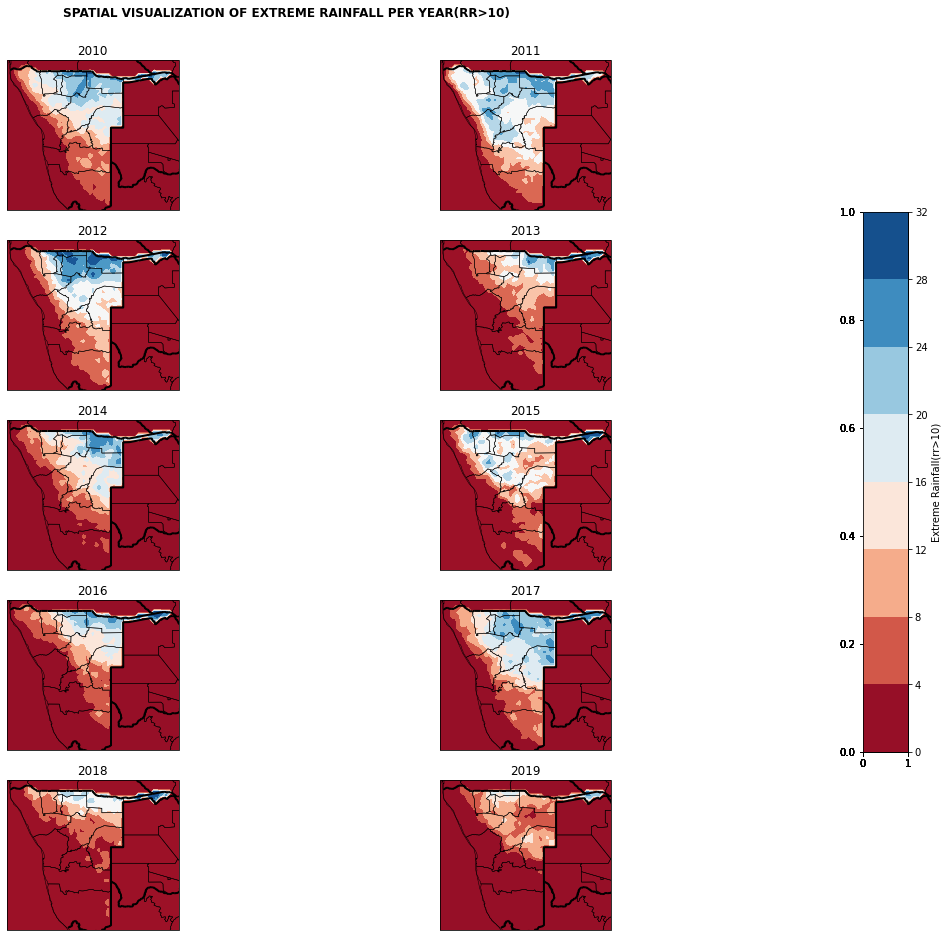

In [19]:
# spatial plots for Extreme days per year(rr>10)
fig,ax=plt.subplots(5,2,figsize=(25,15), 
                    subplot_kw={'projection': ccrs.PlateCarree()})
ax=ax.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)

    ax[i].set_extent([11.5,25.5,-16.5,-28.75])
    ax[i].set_title(annual_totals.year.data[i])
    cb= ax[i].contourf(Xrain10.lon, Xrain10.lat, Xrain10[i],
                       cmap='RdBu', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Extreme Rainfall(rr>10)')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('SPATIAL VISUALIZATION OF EXTREME RAINFALL PER YEAR(RR>10)', fontweight='bold');
plt.savefig('done14.png');

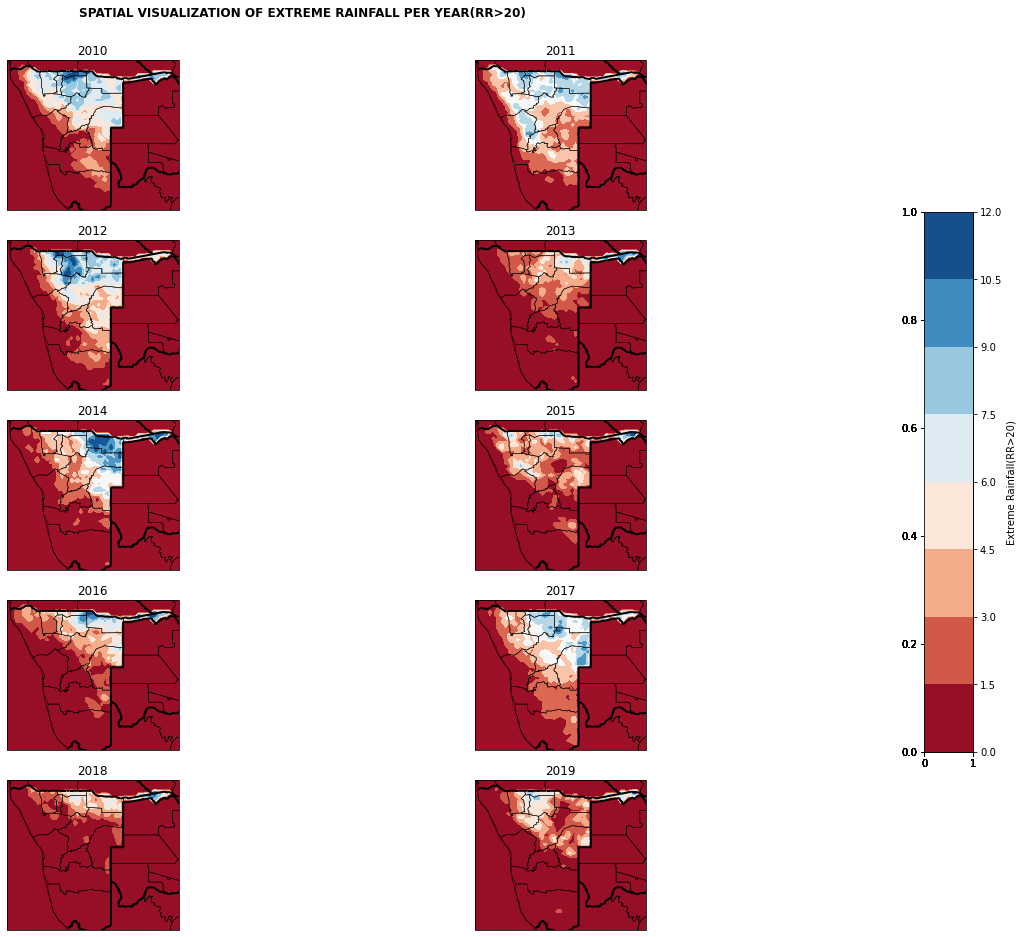

In [21]:
# spatial plots for Extreme Rainfall per year(rr>20)
fig,ax=plt.subplots(5,2,figsize=(27,15), 
                    subplot_kw={'projection': ccrs.PlateCarree()})
ax=ax.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
    ax[i].add_feature(cfeature.OCEAN)
    #ax[i].add_feature(cfeature.LAKES, color='blue')
    #ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([11.5,25.5,-16.5,-28.75])
    ax[i].set_title(annual_totals.year.data[i])
    cb= ax[i].contourf(Xrain20.lon, Xrain20.lat, Xrain20[i],
                       cmap='RdBu', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Extreme Rainfall(RR>20)')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('SPATIAL VISUALIZATION OF EXTREME RAINFALL PER YEAR(RR>20)', fontweight='bold');
plt.savefig('done15.png');